In [1]:
from sklearn.cluster import KMeans
from MNE_Pipeline import MNE_Repo_Mat
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
mp = MNE_Repo_Mat()

In [3]:
subjects = sorted([os.path.splitext(file)[0] for file in os.listdir('Data/') if file.endswith('.mat')])
subjects_path = sorted(['Data/{}'.format(file) for file in os.listdir('Data/') if file.endswith('.mat')])

In [4]:
RTs = []
for path in tqdm(subjects_path):
    data = mp.load_data(path)
    RTs.extend(data['RT'].tolist())


100%|██████████| 50/50 [00:26<00:00,  1.88it/s]


In [5]:
rts = -np.sort(-np.nan_to_num(RTs))

In [6]:
rts = rts.reshape((len(RTs), 1))

In [29]:
kmn = KMeans(n_clusters=3, max_iter=10, random_state=10)
kmn.fit(rts)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [44]:
kmn.cluster_centers_[0][0]

376.27540509982725

In [33]:
with open('kmeans_RT_model.pkl', 'wb') as file:
    pickle.dump(kmn, file)

In [34]:
with open('kmeans_RT_model.pkl', 'rb') as file:
    kmm_ = pickle.load(file)

In [37]:
kmm_.cluster_centers_

array([[ 376.2754051 ],
       [ 662.53836705],
       [1301.72133276]])

In [31]:
pred = kmn.predict(rts)

In [40]:
kmn.predict([[500]])

array([0], dtype=int32)

In [72]:
rts_1d = np.reshape(rts, (len(rts)))

In [73]:
rts_1d.min()

-148.0

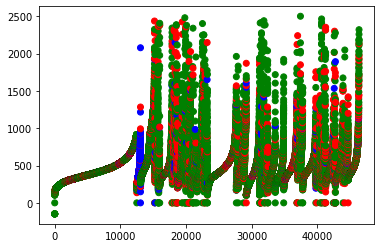

In [74]:
colors = np.array(['red', 'green', 'blue'])
plt.scatter(list(range(0, len(rts_1d))), rts_1d, c=colors[pred])